In [1]:
random_state = 16

## Imports

In [2]:
!pip install scikit-learn xgboost scikit-optimize

In [3]:
!pip install pandas numpy seaborn matplotlib yellowbrick scipy

In [4]:
#imports
from sklearn.ensemble import BaggingRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.pipeline import Pipeline
from sklearn.model_selection import HalvingGridSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt    
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.style import set_palette
from yellowbrick.style import rcmod
from sklearn.feature_selection import SelectFromModel

## Parameters

In [5]:
num=list(np.logspace(-2, 1, num = 20))
max=1
etas = list(filter(lambda x: x <= max, num))
etas

[0.01,
 0.01438449888287663,
 0.0206913808111479,
 0.029763514416313176,
 0.04281332398719394,
 0.06158482110660264,
 0.08858667904100823,
 0.12742749857031335,
 0.18329807108324356,
 0.26366508987303583,
 0.37926901907322497,
 0.5455594781168517,
 0.7847599703514611]

In [6]:
param_xgb = {
    "estimator__max_depth" : range(1, 6),
    "estimator__eta" : etas,

}

In [8]:
parameters_dtc = {
    'estimator__max_depth':range(1, 15),
}

In [22]:
parameters_knr = {
    'n_neighbors':range(1, 80),
}

## Data

In [10]:
!ls

clusters2.csv	       esm_p2_xgb.txt		mlp_1.png
DTC_esm_P1.png	       esm_pipeline_1.ipynb	mlp_2.png
DTC_esm_P2.png	       esm_pipeline_2.ipynb	mlp_esm_1.png
EN_esm_P2.png	       esm_preprocessing.ipynb	mlp_esm_2.png
en_esm.png	       esm_protherm_1280.csv	preprocessing.ipynb
esm_complete_1280.csv  esm_test_1280.csv	protherm_deep_physchem.csv
esm_complete.csv       esm_test.csv		protherm.xlsx
esm_features.csv       esm_train_1280.csv	zero_features_1280.csv
esm_groups_1280.csv    esm_train.csv		zero_features_esm.csv
esm_groups.csv	       KNN_esm_P1.png
esm_p1_xgb.txt	       KNN_esm_P2.png


In [11]:
train = pd.read_csv("esm_train_1280.csv", index_col = 0)
train.head()

,Protein_ID,Tm_C,0,1,2,3,4,5,6,7,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,P00350,57.83,0.061456,-0.018783,-0.010231,0.061477,-0.026708,-0.001284,0.066149,-0.251243,...,0.003973,-0.101666,-0.036435,-0.049548,-0.001934,0.003177,0.043629,-0.133913,0.007773,0.049505
1,P00363,46.77,0.034969,0.042067,0.013021,-0.032451,-0.087499,-0.042588,0.037960,-0.183190,...,-0.032316,-0.082484,-0.027231,-0.032674,-0.032110,0.050828,0.059285,-0.132150,0.012745,0.077547
2,P00370,58.78,0.053757,-0.021765,-0.029727,0.024891,-0.024003,-0.017309,0.041215,-0.213883,...,-0.009158,-0.060221,-0.066123,-0.024452,0.011502,0.016854,0.007332,-0.101124,-0.010835,0.105137
3,P00448,66.59,-0.026329,-0.123985,-0.002493,0.070453,-0.023620,-0.072184,0.017002,-0.184937,...,0.020440,-0.048012,-0.023534,0.022797,-0.054544,-0.051367,0.041085,-0.204482,-0.001493,0.067742
5,P00490,47.89,0.010293,-0.059319,-0.064765,0.008851,-0.096821,-0.024146,0.027961,-0.113776,...,-0.006825,-0.046164,-0.100880,-0.018914,-0.023522,0.016062,0.027163,-0.199782,-0.008798,0.161164


In [12]:
test = pd.read_csv("esm_test_1280.csv", index_col = 0)
test.head()

,Protein_ID,Tm_C,0,1,2,3,4,5,6,7,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
4,P00452,44.79,-0.030523,-0.028832,0.017711,0.119092,-0.099517,0.040022,0.028322,-0.127345,...,0.140361,-0.007807,-0.133724,0.026237,-0.004347,0.040577,-0.003302,-0.161196,-0.032264,0.173568
16,P00895,46.49,-0.017417,-0.010529,0.028629,0.017736,-0.102040,-0.032673,0.034530,-0.061171,...,0.054166,-0.071133,-0.157430,0.061561,-0.078844,-0.015816,0.054790,-0.141735,-0.027016,0.081756
18,P00909,44.71,0.048733,-0.078694,-0.018904,0.008294,-0.056692,-0.021930,0.057865,-0.156708,...,0.067025,-0.049149,-0.103326,-0.013025,-0.069809,-0.056671,0.127321,-0.147841,0.029756,0.095406
19,P00934,48.48,0.008325,-0.088589,0.024109,0.075197,-0.097268,-0.003867,0.104619,-0.139509,...,0.008444,-0.037444,-0.109918,-0.004216,-0.058337,-0.072301,0.039237,-0.203126,-0.055722,0.149343
21,P00946,49.10,0.031946,-0.118324,0.012960,0.085051,-0.082697,0.003132,0.076346,-0.106143,...,0.057211,-0.058940,-0.128933,-0.024187,-0.039388,-0.060909,0.029982,-0.242910,-0.001270,0.140671


In [13]:
groups = pd.read_csv("esm_groups_1280.csv", index_col = 0)
groups.head()

,cluster#
0,3092
1,0
2,1
3,734
5,1396


In [14]:
X_train = train.drop(columns=['Tm_C', 'Protein_ID'])
y_train = train['Tm_C']
X_test = test.drop(columns=['Tm_C', 'Protein_ID'])
y_test = test['Tm_C']

In [15]:
X_train.shape, X_test.shape

((5338, 1280), (1334, 1280))

In [16]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.061456,-0.018783,-0.010231,0.061477,-0.026708,-0.001284,0.066149,-0.251243,0.005818,-0.014427,...,0.003973,-0.101666,-0.036435,-0.049548,-0.001934,0.003177,0.043629,-0.133913,0.007773,0.049505
1,0.034969,0.042067,0.013021,-0.032451,-0.087499,-0.042588,0.037960,-0.183190,0.015454,0.000416,...,-0.032316,-0.082484,-0.027231,-0.032674,-0.032110,0.050828,0.059285,-0.132150,0.012745,0.077547
2,0.053757,-0.021765,-0.029727,0.024891,-0.024003,-0.017309,0.041215,-0.213883,0.076203,-0.048736,...,-0.009158,-0.060221,-0.066123,-0.024452,0.011502,0.016854,0.007332,-0.101124,-0.010835,0.105137
3,-0.026329,-0.123985,-0.002493,0.070453,-0.023620,-0.072184,0.017002,-0.184937,0.052806,0.059320,...,0.020440,-0.048012,-0.023534,0.022797,-0.054544,-0.051367,0.041085,-0.204482,-0.001493,0.067742
5,0.010293,-0.059319,-0.064765,0.008851,-0.096821,-0.024146,0.027961,-0.113776,-0.055357,0.007494,...,-0.006825,-0.046164,-0.100880,-0.018914,-0.023522,0.016062,0.027163,-0.199782,-0.008798,0.161164


In [17]:
groups.shape

(5338, 1)

## XGBoost

In [38]:
xgb = XGBRegressor(random_state=random_state)
rs = RandomizedSearchCV(
        RFE(xgb, n_features_to_select=100, step  = 50),
        param_xgb, 
        cv=GroupKFold(n_splits=5),
        scoring="neg_root_mean_squared_error", 
        refit = "neg_root_mean_squared_error", 
        return_train_score=True, 
        error_score='raise', 
        n_jobs=-1
)
rs.fit(X_train, y_train, groups = groups)
    

print(rs.best_estimator_)
y_pred_train = rs.predict(X_train)
print("xgb train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train,y_pred_train,  squared = False),
                                                    r2_score(y_train, y_pred_train), pearsonr(y_train,y_pred_train)))
y_pred_test = rs.predict(X_test)
print("xgb test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_pred_test, squared = False),
                                            r2_score(y_test, y_pred_test), pearsonr(y_test, y_pred_test)))

print()

RFE(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, early_stopping_rounds=None,
                           enable_categorical=False, eta=0.06158482110660264,
                           eval_metric=None, feature_types=None, gamma=None,
                           gpu_id=None, grow_policy=None, importance_type=None,
                           interaction_constraints=None, learning_rate=None,
                           max_bin=None, max_cat_threshold=None,
                           max_cat_to_onehot=None, max_delta_step=None,
                           max_depth=5, max_leaves=None, min_child_weight=None,
                           missing=nan, monotone_constraints=None,
                           n_estimators=100, n_jobs=None,
                           num_parallel_tree=None, predictor=None, ...),
    n_features_to_select=100, step=50)
xgb trai

In [39]:
with open("esm_p1_xgb.txt", 'w') as f: 
    for key, value in rs.cv_results_.items(): 
        f.write('%s:%s\n' % (key, value))

In [40]:
np.mean(rs.cv_results_['mean_test_score']), np.mean(rs.cv_results_['mean_train_score'])

(-9.039018863707623, -7.796244671630605)

## Decision Tree

In [18]:
for i in range(100, 500, 100):
    rfe = RFE(DecisionTreeRegressor(random_state=random_state), n_features_to_select=i, step  = 10)
    rfe.fit(X_train, y_train)
    print(f'Number of features: {i}')
    grid_dtc = GridSearchCV(
        rfe, 
        parameters_dtc, 
        scoring = ['neg_root_mean_squared_error'], 
        refit = 'neg_root_mean_squared_error', 
        cv = GroupKFold(n_splits=5),
        return_train_score=True, 
        n_jobs=-1, 
        error_score='raise'
    )
    grid_dtc.fit(X_train, y_train, groups = groups)
    print(grid_dtc.best_estimator_)
    dtc = grid_dtc.best_estimator_

    y_pred_train = dtc.predict(X_train)
    print("decision train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train,y_pred_train,  squared = False),
                                                    r2_score(y_train, y_pred_train), pearsonr(y_train,y_pred_train)))
    y_test_dtr = dtc.predict(X_test)
    print("decision test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_test_dtr, squared = False),
                                            r2_score(y_test, y_test_dtr), pearsonr(y_test, y_test_dtr)))
    print()                                 


Number of features: 100
RFE(estimator=DecisionTreeRegressor(max_depth=5, random_state=16),
    n_features_to_select=100, step=10)
decision train RMSE: 7.165274900479087, R2: 0.6749423190261635, PCC: PearsonRResult(statistic=0.8215487319850014, pvalue=0.0)
decision test RMSE: 8.13061327950187, R2: 0.5750785942449099, PCC: PearsonRResult(statistic=0.7603989923286886, pvalue=5.953361220147887e-252)

Number of features: 200
RFE(estimator=DecisionTreeRegressor(max_depth=5, random_state=16),
    n_features_to_select=200, step=10)
decision train RMSE: 7.165274900479087, R2: 0.6749423190261635, PCC: PearsonRResult(statistic=0.8215487319850013, pvalue=0.0)
decision test RMSE: 8.133816891931126, R2: 0.574743674445972, PCC: PearsonRResult(statistic=0.7602804716719637, pvalue=7.9139882967220515e-252)

Number of features: 300
RFE(estimator=DecisionTreeRegressor(max_depth=5, random_state=16),
    n_features_to_select=300, step=10)
decision train RMSE: 7.165274900479087, R2: 0.6749423190261635, PCC: 

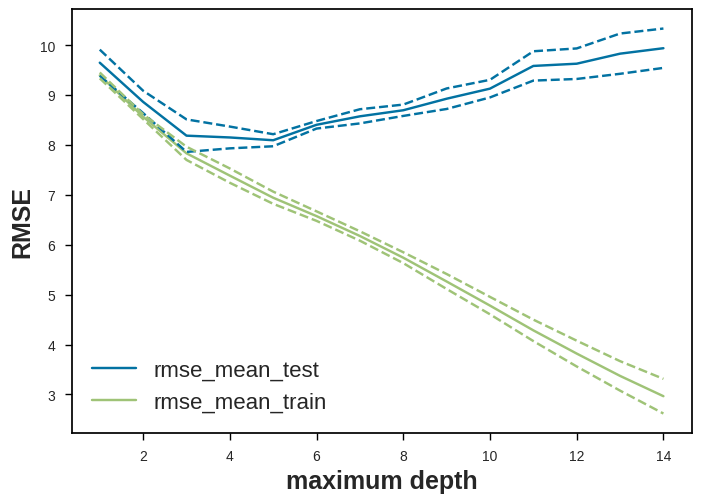

In [21]:
scores_mean_test = grid_dtc.cv_results_['mean_test_neg_root_mean_squared_error']*-1
scores_mean_train = grid_dtc.cv_results_['mean_train_neg_root_mean_squared_error']*-1
scores_std_test = grid_dtc.cv_results_['std_test_neg_root_mean_squared_error']*-1
scores_std_train = grid_dtc.cv_results_['std_train_neg_root_mean_squared_error']*-1
range_depth = parameters_dtc['estimator__max_depth']


plt.figure()

plt.rcParams["axes.edgecolor"] = 'black'
plt.grid(False)
plt.tick_params(axis="x", direction="out", length = 5, color = 'black')
plt.tick_params(axis="y", direction="out", length = 5, color = 'black')

plt.plot(range_depth, scores_mean_test, 'b')
plt.plot(range_depth, scores_mean_train, 'g')



plt.plot(range_depth, scores_mean_test + scores_std_test, 'b--')
plt.plot(range_depth, scores_mean_test - scores_std_test, 'b--')

plt.plot(range_depth, scores_mean_train + scores_std_train, 'g--')
plt.plot(range_depth, scores_mean_train - scores_std_train, 'g--')

plt.xlabel('maximum depth', fontweight='bold', fontsize=18)
plt.ylabel('RMSE', fontweight='bold', fontsize=18)
plt.legend(['rmse_mean_test', 'rmse_mean_train'], loc = 'lower left', fontsize=16)
plt.savefig('DTC_esm_P1.png')
plt.show()

## KNeighborsRegressor



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
knr = KNeighborsRegressor()
rfe = RFE(estimator=Ridge(), n_features_to_select=100, step  = 50)
pipeline = Pipeline(steps=[('feature_selection', rfe), ('regressor', knr)])
grid_knr = GridSearchCV(
    pipeline, 
    param_grid = parameters_knr, 
    scoring = ['neg_root_mean_squared_error'], 
    refit = 'neg_root_mean_squared_error', 
    cv = GroupKFold(n_splits=5),
    return_train_score=True, 
    n_jobs=-1, 
    error_score='raise'
)
grid_knr.fit(X_train, y_train, groups = groups)
print(grid_knr.best_estimator_)
knr = grid_knr.best_estimator_

y_pred_train = knr.predict(X_train)
print("knr train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train,y_pred_train,  squared = False),
                                                 r2_score(y_train, y_pred_train), pearsonr(y_train,y_pred_train)))
y_test_knr = knr.predict(X_test)
print("knr test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_test_knr, squared = False),
                                                r2_score(y_test, y_test_knr), pearsonr(y_test, y_test_knr)))


Pipeline(steps=[('feature_selection',
                 RFE(estimator=Ridge(), n_features_to_select=100, step=50)),
                ('regressor', KNeighborsRegressor(n_neighbors=24))])
knr train RMSE: 6.565671666850295, R2: 0.7270688906283631, PCC: PearsonRResult(statistic=0.8543416562498645, pvalue=0.0)
knr test RMSE: 6.959649474060718, R2: 0.6886587010256707, PCC: PearsonRResult(statistic=0.8311397543817329, pvalue=0.0)


In [43]:
knr = KNeighborsRegressor()
grid_knr = RandomizedSearchCV(knr, parameters_knr, scoring = ['neg_mean_squared_error'], refit = 'neg_mean_squared_error', cv = GroupKFold(n_splits=5), return_train_score=True, n_jobs=-1, error_score='raise')
grid_knr.fit(X_train, y_train, groups = groups)
print(grid_knr.best_estimator_)
knr = grid_knr.best_estimator_

y_pred_train = knr.predict(X_train)
print("knr train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train,y_pred_train,  squared = False),
                                                 r2_score(y_train, y_pred_train), pearsonr(y_train,y_pred_train)))
y_test_knr = knr.predict(X_test)
print("knr test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_test_knr, squared = False),
                                                r2_score(y_test, y_test_knr), pearsonr(y_test, y_test_knr)))


KNeighborsRegressor(n_neighbors=22)
knr train RMSE: 6.726679034427654, R2: 0.7135187981538137, PCC: PearsonRResult(statistic=0.8470313739773727, pvalue=0.0)
knr test RMSE: 7.072563727508294, R2: 0.6784742660033611, PCC: PearsonRResult(statistic=0.8262475304561626, pvalue=0.0)


In [23]:
knr = KNeighborsRegressor()
grid_knr = GridSearchCV(knr, parameters_knr, scoring = ['neg_root_mean_squared_error'], refit = 'neg_root_mean_squared_error', cv = GroupKFold(n_splits=5), return_train_score=True, n_jobs=-1, error_score='raise')
grid_knr.fit(X_train, y_train, groups = groups)
print(grid_knr.best_estimator_)

KNeighborsRegressor(n_neighbors=17)


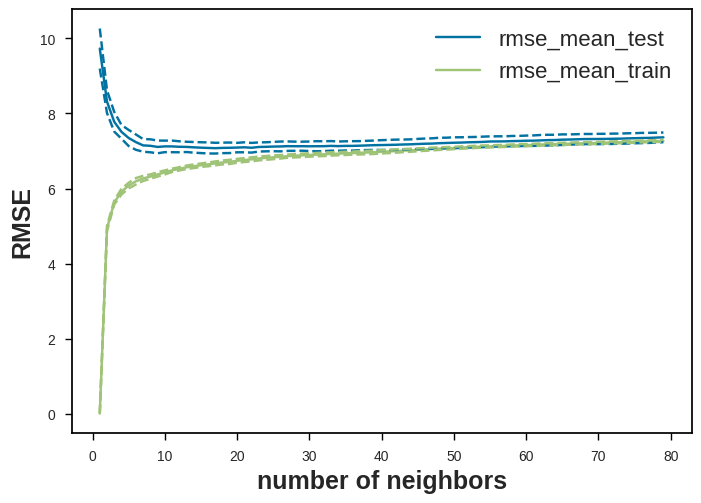

In [25]:
scores_mean_test = grid_knr.cv_results_['mean_test_neg_root_mean_squared_error']*-1
scores_mean_train = grid_knr.cv_results_['mean_train_neg_root_mean_squared_error']*-1
scores_std_test = grid_knr.cv_results_['std_test_neg_root_mean_squared_error']*-1
scores_std_train = grid_knr.cv_results_['std_train_neg_root_mean_squared_error']*-1
range_depth = parameters_knr['n_neighbors']

plt.figure()

plt.rcParams["axes.edgecolor"] = 'black'
plt.grid(False)
plt.tick_params(axis="x", direction="out", length = 5, color = 'black')
plt.tick_params(axis="y", direction="out", length = 5, color = 'black')

plt.plot(range_depth, scores_mean_test, 'b')
plt.plot(range_depth, scores_mean_train, 'g')

plt.plot(range_depth, scores_mean_test + scores_std_test, 'b--')
plt.plot(range_depth, scores_mean_test - scores_std_test, 'b--')

plt.plot(range_depth, scores_mean_train + scores_std_train, 'g--')
plt.plot(range_depth, scores_mean_train - scores_std_train, 'g--')

plt.xlabel('number of neighbors', fontweight='bold', fontsize = 18)
plt.ylabel('RMSE', fontweight='bold', fontsize = 18)
plt.legend(['rmse_mean_test', 'rmse_mean_train'], loc = 'upper right', fontsize = 16)
plt.savefig('KNN_esm_P1.png')

plt.show()

In [48]:
knr = grid_knr.best_estimator_
#knr.fit(X_train, y_train)

y_pred_train = knr.predict(X_train)
print("knr train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train,y_pred_train,  squared = False),
                                                 r2_score(y_train, y_pred_train), pearsonr(y_train,y_pred_train)))
y_test_knr = knr.predict(X_test)
print("knr test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_test_knr, squared = False),
                                                r2_score(y_test, y_test_knr), pearsonr(y_test, y_test_knr)))


knr train RMSE: 6.636748900055761, R2: 0.7211276273809066, PCC: PearsonRResult(statistic=0.8513149455757033, pvalue=0.0)
knr test RMSE: 7.083648558530511, R2: 0.6774656214600423, PCC: PearsonRResult(statistic=0.8251395510851044, pvalue=0.0)


## MLP

In [111]:
mlp = make_pipeline(
    MinMaxScaler(),
    MLPRegressor(
        hidden_layer_sizes=(64, 32), early_stopping=True, random_state=random_state, max_iter = 500
    ),
)
#bag = BaggingRegressor(estimator=mlpr, n_estimators=20, random_state=random_state)
mlp.fit(X_train, y_train)

y_pred_train = mlp.predict(X_train)
print("mlpr train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train, y_pred_train, squared=False),
                                             r2_score(y_train, y_pred_train), pearsonr(y_train, y_pred_train)))

y_pred_test = mlp.predict(X_test)
print("mlpr test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_pred_test, squared=False),
                                            r2_score(y_test, y_pred_test), pearsonr(y_test, y_pred_test)))

mlpr train RMSE: 6.390393102209197, R2: 0.7414468296423189, PCC: PearsonRResult(statistic=0.8635667097808779, pvalue=0.0)
mlpr test RMSE: 6.739568479975175, R2: 0.7080381004514855, PCC: PearsonRResult(statistic=0.8437869419010234, pvalue=0.0)


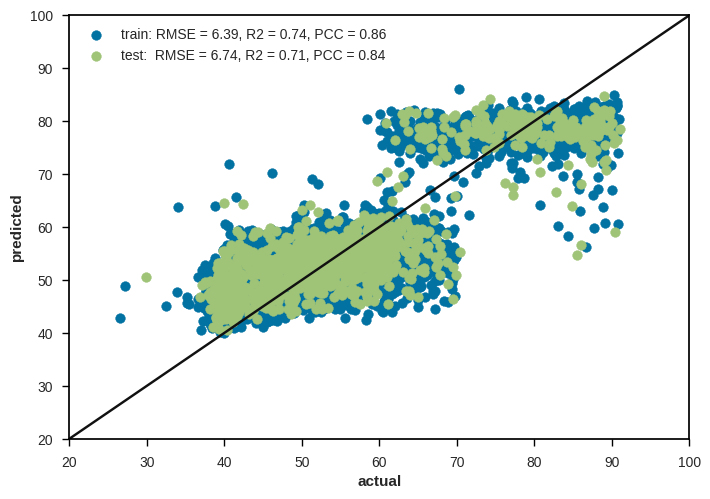

In [114]:
x = np.linspace(0, 100, 110)
plt.rcParams["axes.edgecolor"] = 'black'
#plt.axis('equal')
plt.xlim(20,100)
plt.ylim(20,100)
plt.grid(False)

plt.ylabel('predicted', fontweight='bold')
plt.xlabel('actual', fontweight='bold')
plt.plot(x,x,'k-') # identity line
plt.scatter(y_train, y_pred_train, label = 'train: RMSE = 6.39, R2 = 0.74, PCC = 0.86')
plt.scatter(y_test, y_pred_test, label = 'test:  RMSE = 6.74, R2 = 0.71, PCC = 0.84')

plt.tick_params(axis="x", direction="out", length = 5, color = 'black')
plt.tick_params(axis="y", direction="out", length = 5, color = 'black')
plt.legend()
plt.savefig('mlp_esm_1.png')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


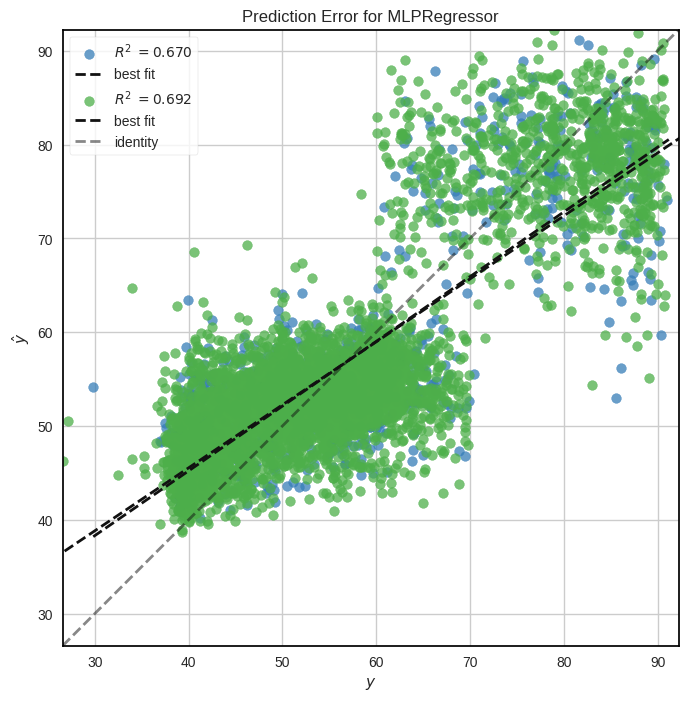

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [27]:

visualizer = PredictionError(mlpr_1, size = (800, 800)) 
# fit visualizer on training data
set_palette('bold')
visualizer.fit(X_train, y_train) 
#Evaluate on test data
visualizer.score(X_test, y_test)
visualizer.score(X_train, y_train)

visualizer.show()